<span style="font-size:24px;">**Dermoscopic images analysis**</span>

<div style='font-size:20px;'>Here I attempt to analyze quality/acceptability of the images, so the PCP could retake an image immediately, thus reducing repeat patients' visits.
There are a few common problems possible:
<ol>
    <li>blurriness - caused by out of focus, or movement</li>
    <li>overexposure/underexposure - wrong exposure setting, error with skin darkness/lightness</li>
    <li>color constancy - color/hue shift, caused by an error in hardware color calibration, wrong exposure setting </li>
</ol>
One of the most <a href='https://pyimagesearch.com/2015/09/07/blur-detection-with-opencv/'>popular approaches</a> to determine image blurriness is based on variance of laplacian operator (which is an approximation of second derivative over discrete 2D matrix) over gray version of the image. In essence it allows to estimate how many edges there are in the images. <br>
So, the bigger the number the sharper the image - I'll call it Sharpness Index here. In general, this approach works pretty well for regular everyday images. One just needs to define a suitable threshold to make a decision if the image is sharp or not.</div>

<span style="font-size:20px;">The example below of a regular scene with significant blur gives as an index of 83 while the next image which is sharp has an index of about 1000.</span><br>
![](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2015/09/detecting_blur_result_001-785x1024.jpg?lossy=1&strip=1&webp=1)
![](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2015/09/detecting_blur_result_003.jpg?lossy=1&strip=1&webp=1)

<span style="font-size:20px;">This approach works quite well in the regular images analysis and is widely used in computer vision applications. However to compute the lapalcian we have to convert an RGB image into gray-scale space, loosing color information. Moreover human skin is quite smooth and lack many pronounced details, leading to significantly fewer well defined edges in any dermoscopic image.<br>
In the first notebook I analyzed this approach and showed that we can't rely on it, since there is no way to set a reasonable threshold for the decision-making.
Below is an example of 9 randomly selected images of bening lesions, where 8 images have index below 20. </span>

![](https://www.kaggleusercontent.com/kf/115689663/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..60m3BtR0L9eYUhRCcFkGqg.cuo-Py26Z_RfUk3ALnWr3kMjA4PCWAKSKjmjqNE_0SW_3GphVj2YbtoKu8y-HLgWELe-mCmfgbtFRpcVIN_PhEf1SS-psEoTTzwOpOq-YViyGRPkLXKvhBmvV6uyJmMu4mut_sjCvS_1UTLgwzuleD5pWWD0X67a86tXwm4ts2fH_b7txHVOpTXJKNEJYAlUsyR7_EjNqb5ZJ5KpCN-nqQrhrViSi7mHBKAyKKhF6Z66vEKdv1KBX_NciQ608oxGcl0zB_FegRBfNWioemeLsffrNfbBb2udGwTPMh6zTvKuFYgoOHDWgVYnydpLbJQrot_E5Vm4k-kvZy7YoHNQLY3U_T_V8Q2Hk1llolEdcp-Y84KIzHbe2MSRGdo1YML7t9jPq3mFsNuVHbv7ReN7dqIm6Z1FTPHWjgsH0JuWUB4WK_R37ot0KB9MX3dWdlhmd6gzkCm3mKfoEnOL91nrO4JmxtwVWf1euJO8J3E0RFrbaDzTiIaWzPVsxItV2Ux0TmHCFdm7S_oL-Ll0-JkSESawA8FA-AS20p8hP0SktRfgkF-I_5G5HhqkNMfxWgrPu3E2UCXqrvFEo102booK1ntsMjdxs18hmypC6MWnnIqtvTTD111dDMIaar8GkO6hpKxvfW5_Ih6stBaYgmRTag.jRNjVpPlqxXMvZNHYpR_Cw/__results___files/__results___9_1.png)


<span style="font-size:20px;">And out of the 9 randomly selected malignant cases only 3 within circular field of view have the index greater than 25 (mostly due to the well defined image edge itself).</span>
![](https://www.kaggleusercontent.com/kf/115689663/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..60m3BtR0L9eYUhRCcFkGqg.cuo-Py26Z_RfUk3ALnWr3kMjA4PCWAKSKjmjqNE_0SW_3GphVj2YbtoKu8y-HLgWELe-mCmfgbtFRpcVIN_PhEf1SS-psEoTTzwOpOq-YViyGRPkLXKvhBmvV6uyJmMu4mut_sjCvS_1UTLgwzuleD5pWWD0X67a86tXwm4ts2fH_b7txHVOpTXJKNEJYAlUsyR7_EjNqb5ZJ5KpCN-nqQrhrViSi7mHBKAyKKhF6Z66vEKdv1KBX_NciQ608oxGcl0zB_FegRBfNWioemeLsffrNfbBb2udGwTPMh6zTvKuFYgoOHDWgVYnydpLbJQrot_E5Vm4k-kvZy7YoHNQLY3U_T_V8Q2Hk1llolEdcp-Y84KIzHbe2MSRGdo1YML7t9jPq3mFsNuVHbv7ReN7dqIm6Z1FTPHWjgsH0JuWUB4WK_R37ot0KB9MX3dWdlhmd6gzkCm3mKfoEnOL91nrO4JmxtwVWf1euJO8J3E0RFrbaDzTiIaWzPVsxItV2Ux0TmHCFdm7S_oL-Ll0-JkSESawA8FA-AS20p8hP0SktRfgkF-I_5G5HhqkNMfxWgrPu3E2UCXqrvFEo102booK1ntsMjdxs18hmypC6MWnnIqtvTTD111dDMIaar8GkO6hpKxvfW5_Ih6stBaYgmRTag.jRNjVpPlqxXMvZNHYpR_Cw/__results___files/__results___11_1.png)

<span style="font-size:20px;">Essentially the majority of about 33k images have the index below 25 </span><br>
![](https://www.kaggleusercontent.com/kf/115689663/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..60m3BtR0L9eYUhRCcFkGqg.cuo-Py26Z_RfUk3ALnWr3kMjA4PCWAKSKjmjqNE_0SW_3GphVj2YbtoKu8y-HLgWELe-mCmfgbtFRpcVIN_PhEf1SS-psEoTTzwOpOq-YViyGRPkLXKvhBmvV6uyJmMu4mut_sjCvS_1UTLgwzuleD5pWWD0X67a86tXwm4ts2fH_b7txHVOpTXJKNEJYAlUsyR7_EjNqb5ZJ5KpCN-nqQrhrViSi7mHBKAyKKhF6Z66vEKdv1KBX_NciQ608oxGcl0zB_FegRBfNWioemeLsffrNfbBb2udGwTPMh6zTvKuFYgoOHDWgVYnydpLbJQrot_E5Vm4k-kvZy7YoHNQLY3U_T_V8Q2Hk1llolEdcp-Y84KIzHbe2MSRGdo1YML7t9jPq3mFsNuVHbv7ReN7dqIm6Z1FTPHWjgsH0JuWUB4WK_R37ot0KB9MX3dWdlhmd6gzkCm3mKfoEnOL91nrO4JmxtwVWf1euJO8J3E0RFrbaDzTiIaWzPVsxItV2Ux0TmHCFdm7S_oL-Ll0-JkSESawA8FA-AS20p8hP0SktRfgkF-I_5G5HhqkNMfxWgrPu3E2UCXqrvFEo102booK1ntsMjdxs18hmypC6MWnnIqtvTTD111dDMIaar8GkO6hpKxvfW5_Ih6stBaYgmRTag.jRNjVpPlqxXMvZNHYpR_Cw/__results___files/__results___20_0.png)

<div class="alert alert-block alert-success" style="font-size:24px">
<b>The verdict</b> - we can't rely on a single Sharpness Index to decide if a dermoscopic image is sharp enough.
</div>    

<span style="font-size:20px;">Therefore lets analyze these images in different color spaces and estimate Sharpness Index per each channel (still using variance of the laplacian operator). <br>
The [intuition](https://people.cs.rutgers.edu/~elgammal/pub/skin.pdf) - human skin is represented differently in different color spaces and skin color occupies a part of such a space, which might be a compact or large region in the space.
</span>

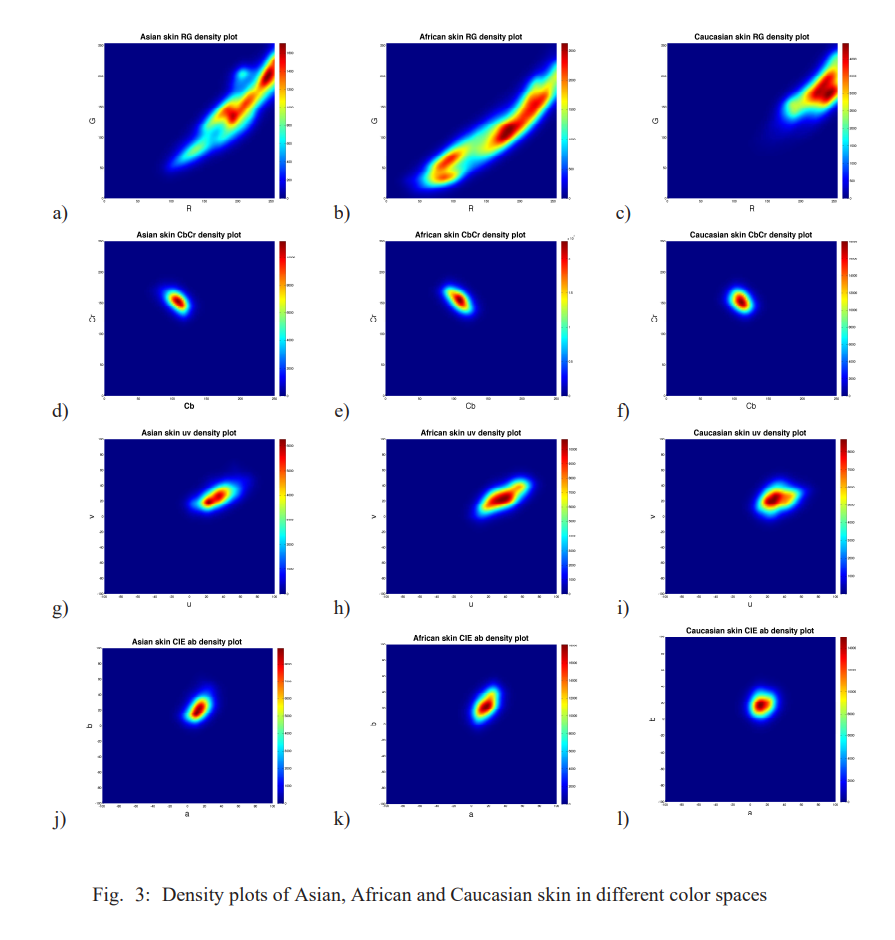

<span style="font-size:20px;">
    I will add <b>HSV</b> and <b>YCbCr</b> color spaces as they provide a few advantages. <br> Unlike RGB, the location of the skin color in the chrominance channels will not be affected by changing the intensity of the illumination in YCbCr space.  Moreover, the skin colors of different races almost co-locate in the chrominance channels.<br> One of the advantages of HSV color space in skin detection is that it could allow users to intuitively specify the boundary of the skin color class in terms of the hue and saturation. As V give the brightness information, it can be dropped to reduce illumination dependency of skin color.
</span>

<span style="font-size:20px;">Below is an example of such analysis of a random image in 3 color spaces with features derived in individual channels for sharpness estimate as well as exposure/contrast. We see that the by-channel representation of the image is drastically different in different color spaces.</span>
![](https://www.kaggleusercontent.com/kf/116641759/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..CSnBcnoQm0cD_ccIpdxnKA.MrEPjTg7oIzp2FePrfsHBcagtukyU69i9QHqQZJHs5GsfsPLjJMK6KVzGBQch8ujYQQBPdth-zy4ULW2PYD6semcq3MxHChWGqnlTfd_8F0MO6tqiOun44JpTOFY_Yjcjaaw1cATapZJYCah9--1to0EIi4dE9CpU2qk_JaLa_SDoEd-tewOlMMr489r_2KmSLy7V3qfsD8Upv3dcv6VA-qKDKhRxFkr-5V3E708tdEOkkgG-brYijruRFaKNG_n-qYezGNOAOb8B2Ekxr4M8znMcjcU9IuPYKKF3Dx5oSzscVCbS596zG1IVy9-HyuXym2ZiavY3IV2f7aW5JCveTKglPlJrC0Dua4bmOvGbCkArin5t_sQ_g0RSOFNQ81SDC5DlVK88XWLyACOTdhgD_kzE-5bB1HL_A-5HK1S6-J2oR0UpfEQfm3Q8SvGToOmQq5BPLET7s1Knqcvb8PLrcaTr9Zw13bSVKS0Y899myA-2YHpirZuJ2RddJ0fA5JdyRdH2C7v7VN0HCQqeiROdvx9zuCERC06GiCgFxRvKjbhXG_cEpDge3mLcWJor9qBfkkqcgNYSCSEkPc-bTBkQAZrhPSpQHFweO8oYi3EfZ8w8TsxSGr4YzVSmDheDZBex386PCaJkjLVLDRMEFpYd0ZQPUVACLqk3YlYmE602Ns.8CQKXx86PfUwaI2nGJLqFw/__results___files/__results___17_7.png)

<span style="font-size:18px;">Percentiles of intensities in RGB space: {5: 140.0, 25: 169.0, 50: 188.0, 75: 222.0, 95: 245.0}<br>
Percentiles of intensities in HSV space: {5: 199.0, 25: 222.0, 50: 235.0, 75: 242.0, 95: 249.0}<br>
Percentiles of intensities in YCrCb space: {5: 161.0, 25: 185.0, 50: 198.0, 75: 207.0, 95: 215.0}<br>
Sharpness Index: <br>
r: 7.42  g: 6.87  b: 8.21  **H: 115.82**  S: 5.72  V: 7.42  Y: 6.28  Cr: 0.50  Cb: 0.58  **Gray: 6.28**  <br>
Full contrast: 0.91; clipped (1%-99%) contrast: 0.33</span>

<span style="font-size:20px;">Another example shows how significantly the Sharpness Index differs between the overall Gray version and H-channel.</span>
![](https://www.kaggleusercontent.com/kf/116641759/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..CSnBcnoQm0cD_ccIpdxnKA.MrEPjTg7oIzp2FePrfsHBcagtukyU69i9QHqQZJHs5GsfsPLjJMK6KVzGBQch8ujYQQBPdth-zy4ULW2PYD6semcq3MxHChWGqnlTfd_8F0MO6tqiOun44JpTOFY_Yjcjaaw1cATapZJYCah9--1to0EIi4dE9CpU2qk_JaLa_SDoEd-tewOlMMr489r_2KmSLy7V3qfsD8Upv3dcv6VA-qKDKhRxFkr-5V3E708tdEOkkgG-brYijruRFaKNG_n-qYezGNOAOb8B2Ekxr4M8znMcjcU9IuPYKKF3Dx5oSzscVCbS596zG1IVy9-HyuXym2ZiavY3IV2f7aW5JCveTKglPlJrC0Dua4bmOvGbCkArin5t_sQ_g0RSOFNQ81SDC5DlVK88XWLyACOTdhgD_kzE-5bB1HL_A-5HK1S6-J2oR0UpfEQfm3Q8SvGToOmQq5BPLET7s1Knqcvb8PLrcaTr9Zw13bSVKS0Y899myA-2YHpirZuJ2RddJ0fA5JdyRdH2C7v7VN0HCQqeiROdvx9zuCERC06GiCgFxRvKjbhXG_cEpDge3mLcWJor9qBfkkqcgNYSCSEkPc-bTBkQAZrhPSpQHFweO8oYi3EfZ8w8TsxSGr4YzVSmDheDZBex386PCaJkjLVLDRMEFpYd0ZQPUVACLqk3YlYmE602Ns.8CQKXx86PfUwaI2nGJLqFw/__results___files/__results___18_5.png)

<span style="font-size:18px;">Percentiles of intensities in RGB space: {5: 28.0, 25: 86.0, 50: 105.0, 75: 161.0, 95: 203.0}<br>
Percentiles of intensities in HSV space: {5: 91.0, 25: 161.0, 50: 189.0, 75: 198.0, 95: 210.0}<br>
Percentiles of intensities in YCrCb space: {5: 44.0, 25: 92.0, 50: 125.0, 75: 134.0, 95: 145.0}<br>
Sharpness Index: <br>
r: 14.44  g: 13.56  b: 15.17  **H: 4966.58**  S: 18.23  V: 14.44  Y: 12.72  Cr: 0.73  Cb: 0.74  **Gray: 12.72**  <br>
Full contrast: 0.70; clipped (1%-99%) contrast: 0.47</span>

<span style="font-size:24px;">**Melanin Index and Erythema Index**</span>
<br>
<span style="font-size:20px;"> In the 3rd notebook I introduce Melanin Index and Erythema Index based on the work of [Zhao Liu et.al](https://rdcu.be/c3IJD). <br>
    I believe we can use it as for the image quality analysis and so for our future lesion classifier.<br><br>
Intuition - a conventional digital image of skin is a composite of the major pigmentation underneath the skin surface, and many external imaging factors (i.e. lighting conditions and camera sensor parameters). Direct use of conventional digital images may not properly quantify the pigmentation distributions, such as melanin and haemoglobin, for the characterisation of the malignancy of suspicious skin lesions.
</span>
<br>

<div class="alert alert-block alert-warning" style="font-size:18px;">
MI = 100 * log(1/R)<br>
EI = 100 * (log(1/G) - 1.44 * log(1/R))
</div>

![](https://www.kaggleusercontent.com/kf/116642009/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..X66fo6ONGlPpjKYhwWIhWQ.udTwu9CLfo1Od4CjzCLMqz9cjjvvgyW4iPu1TSHy_V66LoTNr8bwlerr2fMZexK7P-iWPm0F0F8ObfqQ1-AoZ90486XLkhTMnnxdDL934zjr6_dU0UXGBZ-BewSVazyPIzbH1t0ZDq_0md15HvnSxJnQYcGzj3frFZfiBkWoscHu38Y3giDXFhDmYpgBYLKIQARuvM3xXp1v4XT7hK6Ba9mrnRQhbCgZLMC5Xwf1EPCTtXYGAhsRkrhqxW6-0yD2n_RLPceUQZFavOxRV2EI-zpwF6Hlhfz7oT9dE29l5XJpdt62gkJ0ve3GL8Ct8eOIVJVABLW_7oZF7dVsZcnM7nh6EqBdR5XVJTcw5yofjJO_isO8U_FjtZuca1CkgHeQ6VlXbmT64iDWutW90goD4jMX05-MLmr2ZydSo9R7mG0233maPCOmImyvYucz-WhL78Yfn8oLYHoAcYDJk7-RZcbukr1HL4PeV18rRWAMHRZ2jPj1Yyb7tN1M72iI81p_np4_gmh2q2A7omRkQ6GYfVs8HPu2AedfrZYNddZ39_PwKK23CIUIA3CSlHtRyjniDVgwWko0PuAj5xnbJx-75eCBStva8RU8b8TM9c-koLu8omCFwTlTOMmh0Qvr3K7KlJMJJREIirUSp9l9qAh-_8GoYHrKjWA9pcThTFA4p1QYy2mJfoNDLKHSmWlXWerw.1xmeik8PMjELZkq8RzIDRQ/__results___files/__results___9_13.png)

<span style="font-size:18px;">Percentiles of intensities in RGB space: {5: 84.0, 25: 128.0, 50: 156.0, 75: 190.0, 95: 232.0}<br>
Percentiles of intensities in HSV space: {5: 127.0, 25: 189.0, 50: 213.0, 75: 227.0, 95: 237.0}<br>
Percentiles of intensities in YCrCb space: {5: 92.0, 25: 144.0, 50: 166.0, 75: 183.0, 95: 196.0}<br>
Sharpness Index: <br>
r: 15.09  g: 14.76  b: 15.33  **H: 324.28**  S: 8.58  V: 15.09  Y: 14.37  Cr: 0.35  Cb: 0.29  MI: 2.20  EI: 0.25  **Gray: 14.37**  <br>
Full contrast: 0.90; clipped (1%-99%) contrast: 0.57</span>

<span style="font-size:24px;">**Challenge**</span><br>
<span style="font-size:20px;"> We still have uncertainty with individual features, as it seems we can't determine a single definitive threshold</span>

![](https://www.kaggleusercontent.com/kf/116642009/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..X66fo6ONGlPpjKYhwWIhWQ.udTwu9CLfo1Od4CjzCLMqz9cjjvvgyW4iPu1TSHy_V66LoTNr8bwlerr2fMZexK7P-iWPm0F0F8ObfqQ1-AoZ90486XLkhTMnnxdDL934zjr6_dU0UXGBZ-BewSVazyPIzbH1t0ZDq_0md15HvnSxJnQYcGzj3frFZfiBkWoscHu38Y3giDXFhDmYpgBYLKIQARuvM3xXp1v4XT7hK6Ba9mrnRQhbCgZLMC5Xwf1EPCTtXYGAhsRkrhqxW6-0yD2n_RLPceUQZFavOxRV2EI-zpwF6Hlhfz7oT9dE29l5XJpdt62gkJ0ve3GL8Ct8eOIVJVABLW_7oZF7dVsZcnM7nh6EqBdR5XVJTcw5yofjJO_isO8U_FjtZuca1CkgHeQ6VlXbmT64iDWutW90goD4jMX05-MLmr2ZydSo9R7mG0233maPCOmImyvYucz-WhL78Yfn8oLYHoAcYDJk7-RZcbukr1HL4PeV18rRWAMHRZ2jPj1Yyb7tN1M72iI81p_np4_gmh2q2A7omRkQ6GYfVs8HPu2AedfrZYNddZ39_PwKK23CIUIA3CSlHtRyjniDVgwWko0PuAj5xnbJx-75eCBStva8RU8b8TM9c-koLu8omCFwTlTOMmh0Qvr3K7KlJMJJREIirUSp9l9qAh-_8GoYHrKjWA9pcThTFA4p1QYy2mJfoNDLKHSmWlXWerw.1xmeik8PMjELZkq8RzIDRQ/__results___files/__results___9_17.png)

<span style="font-size:18px;">Percentiles of intensities in RGB space: {5: 81.0, 25: 104.0, 50: 118.0, 75: 168.0, 95: 185.0}<br>
Percentiles of intensities in HSV space: {5: 141.0, 25: 168.0, 50: 176.0, 75: 183.0, 95: 190.0}<br>
Percentiles of intensities in YCrCb space: {5: 99.0, 25: 125.0, 50: 133.0, 75: 140.0, 95: 147.0}<br>
Sharpness Index: <br>
r: 40.46  g: 39.80  b: 40.77  **H: 9.38**  S: 27.33  **V: 40.46**  Y: 39.00  Cr: 0.69  Cb: 0.53  MI: 4.64  EI: 0.56  **Gray: 39.00**  <br>
Full contrast: 0.71; clipped (1%-99%) contrast: 0.42</span>